## Simulation Methods - Homework 1
### Jiaqi Dong

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


## Question 1
### (a)



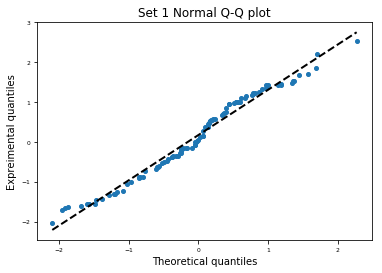

In [2]:
#standard normal generator in numpy
mu, sigma = 0,1
s1 = np.random.normal(mu, sigma, 100)
s2 = np.random.normal(mu, sigma, 1000)
s3 = np.random.normal(mu, sigma, 10000)

s1.sort()
norm=np.random.normal(0,1,len(s1))
norm.sort()
plt.figure(figsize=(6,4),facecolor='1.0') 
plt.plot(norm,s1,"o",ms=4)
z = np.polyfit(norm,s1,1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Set 1 Normal Q-Q plot", size=12)
plt.xlabel("Theoretical quantiles", size=10)
plt.ylabel("Expreimental quantiles", size=10)
plt.tick_params(labelsize=6)
plt.show()

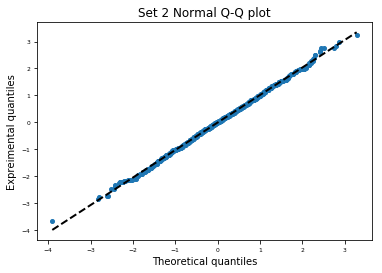

In [3]:
s2.sort()
norm=np.random.normal(0,1,len(s2))
norm.sort()
plt.figure(figsize=(6,4),facecolor='1.0') 
plt.plot(norm,s2,"o",ms=4)
z = np.polyfit(norm,s2,1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Set 2 Normal Q-Q plot", size=12)
plt.xlabel("Theoretical quantiles", size=10)
plt.ylabel("Expreimental quantiles", size=10)
plt.tick_params(labelsize=6)
plt.show()

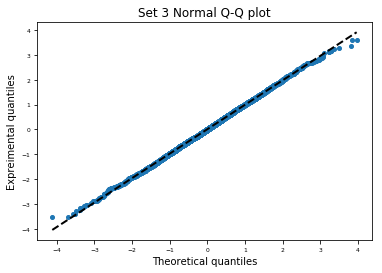

In [4]:
s3.sort()
norm=np.random.normal(0,1,len(s3))
norm.sort()
plt.figure(figsize=(6,4),facecolor='1.0') 
plt.plot(norm,s3,"o",ms=4)
z = np.polyfit(norm,s3,1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Set 3 Normal Q-Q plot", size=12)
plt.xlabel("Theoretical quantiles", size=10)
plt.ylabel("Expreimental quantiles", size=10)
plt.tick_params(labelsize=6)
plt.show()

### (b)

In [5]:
#poor man's normal geneartor
s4 = [(sum(np.random.uniform(1,0,12))-6) for i in range(100)]
s5 = [(sum(np.random.uniform(1,0,12))-6) for i in range(1000)]
s6 = [(sum(np.random.uniform(1,0,12))-6) for i in range(10000)]

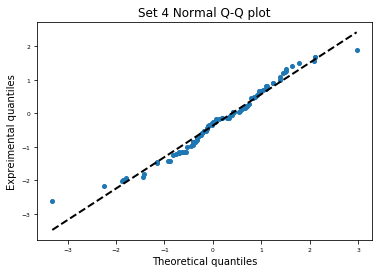

In [6]:
s4.sort()
norm=np.random.normal(0,1,len(s4))
norm.sort()
plt.figure(figsize=(6,4),facecolor='1.0') 
plt.plot(norm,s4,"o",ms=4)
z = np.polyfit(norm,s4,1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Set 4 Normal Q-Q plot", size=12)
plt.xlabel("Theoretical quantiles", size=10)
plt.ylabel("Expreimental quantiles", size=10)
plt.tick_params(labelsize=6)
plt.show()

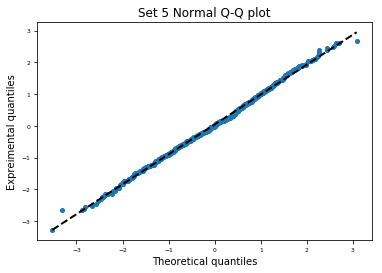

In [7]:
s5.sort()
norm=np.random.normal(0,1,len(s5))
norm.sort()
plt.figure(figsize=(6,4),facecolor='1.0') 
plt.plot(norm,s5,"o",ms=4)
z = np.polyfit(norm,s5,1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Set 5 Normal Q-Q plot", size=12)
plt.xlabel("Theoretical quantiles", size=10)
plt.ylabel("Expreimental quantiles", size=10)
plt.tick_params(labelsize=6)
plt.show()

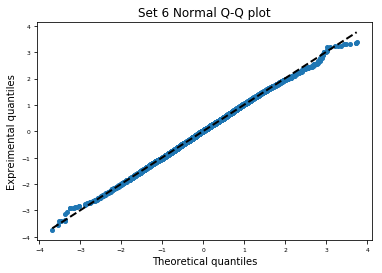

In [8]:
s6.sort()
norm=np.random.normal(0,1,len(s6))
norm.sort()
plt.figure(figsize=(6,4),facecolor='1.0') 
plt.plot(norm,s6,"o",ms=4)
z = np.polyfit(norm,s6,1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Set 6 Normal Q-Q plot", size=12)
plt.xlabel("Theoretical quantiles", size=10)
plt.ylabel("Expreimental quantiles", size=10)
plt.tick_params(labelsize=6)
plt.show()


## Question 2

In [9]:
def payoff_C(ST,strike):
    return(np.maximum(0,ST-strike))

def payoff_P(ST,strike):
    return(np.maximum(0,strike-ST))
    
def straddle_price(s0,k,mu,r,sigma,T,n,payoff_C,payoff_P):
    z = np.random.normal(size=(n,1))
    f1 = (mu-0.5*sigma**2)*T
    f2 = sigma*np.sqrt(T)
    pv = np.exp(-r*T)
    ST = s0*np.exp(f1+f2*z)
    C = pv*payoff_C(ST,k)
    P = pv*payoff_P(ST,k)
    straddle = C+P
    price = np.mean(straddle)
    std = np.std(straddle)/np.sqrt(n)
    return(price,std)

s0 = 100
k = 100
r = 0.05
u = 0.1
sigma = 0.1
T =1
n = 10000
price = straddle_price(s0,k,u,r,sigma,T,n,payoff_C,payoff_P)
print("The price of the straddle is",price[0])
print("The standard error of estimation is", price[1])

The price of the straddle is 11.660293194647654
The standard error of estimation is 0.08667070527052424


## Question 3

In [14]:
#Generate the GBM path recursively
def GBM(So, mu, sigma, T, N):
    W = np.random.normal(0,1,N) #independent random variable
    delta = T/N
    S = []
    S.append(So)
    drift = (mu - 0.5 * sigma**2) * delta
    vol = np.sqrt(sigma * sigma * delta)
    for j in range(1, int(N+1)):
        S.append(S[j-1]*np.exp(drift)*np.exp(vol*W[j-1]))
    return S

n = 10000 #number of simulations
s0 = 100
r = 0.05
sigma = 0.1
T =1
N = 52
A = []
A.append(100)
ST=[]
ST.append(100)
for i in range(1,n):
    temp = GBM(s0,r,sigma,T,N)
    A.append(max((sum(temp)-100)/52-100,0)*np.exp(-r*T))#exclude the time 0
    ST.append(temp[-1])

#correlation between ST and A
cor1 = np.corrcoef(ST,A)[0,1]
print("The correlation coefficient between ST an A is", cor1)
#correlation between ST and (A-100)+
cor2 = np.corrcoef(ST,np.where((np.array(A)-100)>0,np.array(A)-100,0))[0,1]
print("The correlation coefficient between ST an (A-100)+ is", cor2)
cor3 = np.corrcoef(ST,A)[0,1]
print(cor3)

The correlation coefficient between ST an A is 0.792023580873773
The correlation coefficient between ST an (A-100)+ is nan
0.792023580873773


In [5]:
np.where((np.array(A)-100)>0,np.array(A)-100,0)

array([0.        , 0.        , 0.        , ..., 0.        , 3.81979118,
       0.        ])

In order to get the standard error of the estimated correlation coefficient, I replicated the process of calculating the correlation coefficient for 30 times, and calculate the standard error respectively.

In [11]:
cor_e1 = np.zeros(30)
cor_e2 = np.zeros(30)

for j in range(0,30):
    A = []
    A.append(100)
    ST=[]
    ST.append(100)
    for i in range(1,10000):
        temp = GBM(s0,r,sigma,T,N)
        A.append((sum(temp)-100)/52)#exclude the time 0
        ST.append(temp[-1])
    cor_e1[j] = np.corrcoef(ST,A)[0,1]
    cor_e2[j] = np.corrcoef(ST,np.where((np.array(A)-100)>0,np.array(A)-100,0))[0,1]



se1 = np.std(cor_e1)/np.sqrt(len(cor_e1))
se2 = np.std(cor_e2)/np.sqrt(len(cor_e2))

print("The standard error of the estimations of the correlation coefficients are",se1,", ",se2," respectively")

The standard error of the estimations of the correlation coefficients are 0.00044166039370750184 ,  0.0005186742912626088  respectively


## Question 4
### (a)
To get the probablility integral transform, we need to let $u = 1 - (1+\theta x)^{-1/\theta}$ when x >0, then we use u to express x, which yields that $x = F^{-1}(u) = \frac{(1-u)^{-\theta}-1}{\theta}$ This equation means that if U is an observation from standard uniform distribution U(0,1), $X=\frac{(1-U)^{-\theta}-1}{\theta}$ is an observation from Generalized Pareto distribution ($\theta >0$). Since U is a standard uniform distribution, 1-U is also a standard uniform distribution, so we can use $X=\frac{U^{-\theta}-1}{\theta}$ to get the Generalized Pareto distribution.

### (b)
Similar to question (a), we let $u = 1 - e^{-2x(x-b)/h}$, then the x can be expressed as $2x^{2} - 2bx = -h*ln(1-u)$. There are two solutions for this equation, and we need to take the positive solution since $x\geqslant max(0,b)$, then the solution of x is $x = \frac{b}{2} + \frac{\sqrt{b^{2}-2hln(1-u)}}{2}$. If U is uniformly distributed, 1-U is also uniformly distributed. So, $X = \frac{b}{2} + \frac{\sqrt{b^{2}-2hln(U)}}{2}$. Because ln(U)<0, X is surely bigger than b which satisfies the condition.

### (c)
Firstly, we need to derive the cdf of Cauchy Distribution. By definition, the cdf is give by $F_X(x) = \int^u_{-\infty}{f_X(u)du}$. So the cdf of Cauchy Distribution is $F_X(x) = \int^u_{-\infty}{\frac{1}{\pi}\frac{1}{1+u^2}\,du}$. Because $\int^{+\infty}_{-\infty}{\frac{1}{x^2+a^2}}\,dx=\frac{1}{a}tan^{-1}\frac{x}{a}$, in this question $a=1$. Hence, the cdf of Cauchy Distribution is $F_X(x) = \frac{tan^{-1}(x)-tan^{-1}(-\infty)}{\pi} = \frac{tan^{-1}(x)+\frac{\pi}{2}}{\pi}$. Also, $F(\infty) = \frac{\pi/2+\pi/2}{\pi}=1$, so $F_X(x)$ is the cdf of Cauchy Distribution.

To perform the probability integral transform, let $U=F_X(x) = \frac{tan^{-1}(X)+\frac{\pi}{2}}{\pi}$, then $X = tan(\pi U - \pi/2)$. So, when U has a standard Uniform Distribution, X will have a Cauchy Distribution.